# Laboratory: North Carolina Births

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

## Exploratory Data Analysis
Load the nc data set into our workspace.

In [20]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

DF_PATH = Path("../datasets/ncbirths.csv")

nc_births_df = pd.read_csv(DF_PATH)

nc_births_df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


### Exercise 1 - What are the cases in this data set? How many cases are there in our sample?

There are 1000 observations in the data set.

As you review the variable summaries, consider which variables are categorical and which are numerical. For numerical variables, are there outliers? If you aren’t sure or want to take a closer look at the data, make a graph.

[]

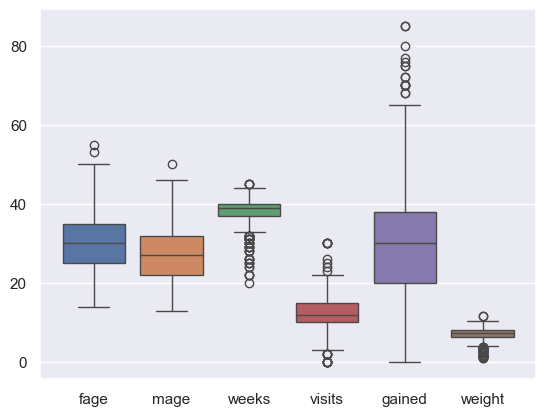

In [27]:
ax = sns.boxplot(nc_births_df)

plt.plot()

Consider the possible relationship between a mother’s smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

### Exercise 2 - Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

[]

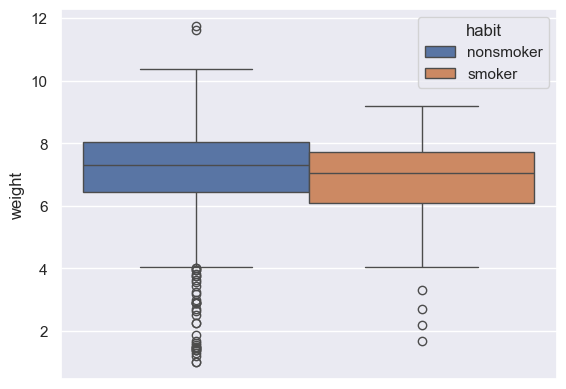

In [31]:
sns.boxplot(y="weight", hue="habit", data=nc_births_df)

plt.plot()

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following function to split the `weight` variable into the `habit` groups, then take the `mean` of each using the mean function.

In [32]:
nc_births_df.groupby("habit").describe()["weight"]

,count,mean,std,min,25%,50%,75%,max
habit,,,,,,,,
nonsmoker,873.0,7.144273,1.518681,1.00,6.4400,7.31,8.060,11.75
smoker,126.0,6.828730,1.386180,1.69,6.0775,7.06,7.735,9.19


There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test.

## Inference

### Exercise 3 - Check if the conditions necessary for inference are satisfied.

The conditions for inference are:

* Independence: and this is met.

* Large sample: and this is met, as we can see from below.

[]

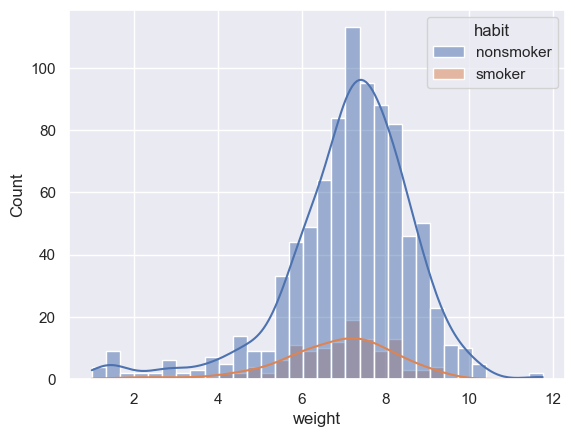

In [44]:
nc_births_df.groupby("habit")["weight"].size()

sns.histplot(x="weight", data=nc_births_df, hue="habit", kde=True)

plt.plot()

### Exercise 4 - Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

* H0: The average weights of babies born to smoking and non-smoking mothers are equal $\mu_1 = \mu_2$.
* H1: The average weights of babies born to smoking and non-smoking mothers are not equal $\mu_1 \neq \mu_2$.

Next, we will perform hypothesis tests and construct confidence intervals.

In [52]:
import statsmodels.stats.weightstats as st

w_smoker = nc_births_df[nc_births_df["habit"] == "smoker"]["weight"]
w_nonsmoker = nc_births_df[nc_births_df["habit"] == "nonsmoker"]["weight"]

w_smoker_dsw = st.DescrStatsW(w_smoker)
w_nonsmoker_dsw = st.DescrStatsW(w_nonsmoker)

diff_of_mean = st.CompareMeans(w_smoker_dsw, w_nonsmoker_dsw)

print(f"Number of smokers = {w_smoker_dsw.nobs}")
print(f"Mean smoker = {w_smoker_dsw.mean}")
print(f"Std smoker = {w_smoker_dsw.std}")
print()
print(f"Number of non smokers = {w_nonsmoker_dsw.nobs}")
print(f"Mean nonsmoker = {w_nonsmoker_dsw.mean}")
print(f"Std nonsmoker = {w_nonsmoker_dsw.std}")

ht = diff_of_mean.ztest_ind(alternative="two-sided", usevar="unequal", value=0)

print()
print(f"Standard error is: {diff_of_mean.std_meandiff_separatevar}")
print(f"Test statistic: Z = {ht[0]}")
print(f"p-value = {ht[1]}")

Number of smokers = 126.0
Mean smoker = 6.828730158730161
Std smoker = 1.380668106117173

Number of non smokers = 873.0
Mean nonsmoker = 7.1442726231386
Std nonsmoker = 1.5178105512705897

Standard error is: 0.13376049190705977
Test statistic: Z = -2.3590109449334746
p-value = 0.018323715325167515


### Exercise 5 - Construct and record a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [54]:
diff_of_mean.zconfint_diff(alternative="two-sided", usevar="unequal")

(-0.577708211100638, -0.05337671771624097)

## On your own

### 1. Calculate a 95% confidence interval for the average length of pregnancies (`weeks`) and interpret it in context. Note that since you’re doing inference on a single population parameter, there is no grouping variable.

Sampled a woman, its pregnancy duration happens to be 95% of the times within that interval.

In [58]:
preg_weeks_ds = st.DescrStatsW(nc_births_df["weeks"].dropna())

preg_weeks_ds.zconfint_mean(alternative="two-sided")

(38.15279117659766, 38.516547500757056)

### 2. Calculate a new confidence interval for the same parameter at the 90% confidence level. 

In [59]:
preg_weeks_ds.zconfint_mean(alpha=0.10, alternative="two-sided")

(38.18203237344748, 38.48730630390724)

### 3. Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

* $H_0 : \mu_y = \mu_m$.
* $H_1 : \mu_y \neq \mu_m$.

### 4. Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.

A young mother is defined as being under 30 years of age.

In [63]:
w_young = nc_births_df[nc_births_df["mage"] < 30]["gained"].dropna()
w_mature = nc_births_df[nc_births_df["mage"] >= 30]["gained"].dropna()

dsw_young = st.DescrStatsW(w_young)
dsw_mature = st.DescrStatsW(w_mature)

diff_young_mature = st.CompareMeans(dsw_young, dsw_mature)

ht = diff_young_mature.ztest_ind(alternative="two-sided", usevar="unequal", value=0)

print(f"Standard error is: {diff_young_mature.std_meandiff_separatevar}")
print(f"Test statistic: Z = {ht[0]}")
print(f"p-value = {ht[1]}")

Standard error is: 0.9523167725989216
Test statistic: Z = 1.039180651357238
p-value = 0.29872072732292654


So, the null hypothesis cannot be rejected.

### 5. Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. 

Does the average weight of babies born to young mothers differ from the average weight of babies born to mature mothers? 

* $H_0 : \mu_y = \mu_m$
* $H_1 : \mu_y \neq \mu_m$

### 6. What concepts from the textbook are covered in this lab? What concepts, if any, are not covered in the textbook? Have you seen these concepts elsewhere, e.g. lecture, discussion section, previous labs, or homework problems? Be specific in your answer.

I think this lab has covered a whole bunch of concepts related to inference for numerical data. I have not read any other book in this topic so I cannot compare.